In [9]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [10]:
# we will often use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 13. A Police Patrol Problem

Please refer to page 69-73 of [the book](https://books.google.ch/books?id=bmhuaGP3FOEC&printsec=frontcover&hl=de&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false) for the problem description.

In [11]:
import numpy as np

# we build a function to find the direction of the patrol car
# i.e. was it travelling towards or away from the accident
def direction(pLane, X, Y) :
    # pLane = lane in which the patrol car initally is
    # X = location of the accident
    # Y = location of the patrol car
    if pLane == 1 :
        if X > Y :
            return 1
        else :
            return 0
    elif pLane == 2 :
        if X < Y :
            return 1
        else :
            return 0
        
# function to find the average travel distance to the accident location
def avgTravelDist(patrolCars, abc, divider) :
    sims = 10**5
    dist = 0
    
    for i in range(sims) :
        patrolLoc = np.zeros(patrolCars)
        # find accident and patrol car(s) locations
        accidentLoc = np.random.rand()  # x
        accidentLane = np.random.choice([1,2])
        
        patrolLanes = [0 for i in range(patrolCars)]
        patrolDirections = [0 for i in range(patrolCars)]
        if abc == "a" :
            patrolLoc[0] = 0.5   # y
            # assign random lanes to the patrol cars
            patrolLanes[0] = np.random.choice([1,2])
            # use the "direction" function above to find the patrol car's direction
            patrolDirections[0] = direction(patrolLanes[0], accidentLoc, patrolLoc[0])
        else :
            patrolLoc = np.random.rand(patrolCars)   # y
            # assign random lanes to the patrol cars
            patrolLanes = np.random.choice([1,2], patrolCars)
            for k in range(patrolCars) :
                patrolDirections[k] = direction(patrolLanes[k], accidentLoc, patrolLoc[k])
        # case "b" corresponds to patrolCars = 1  
        # case "c" corresponds to patrolCars = 2  
        
        travelDist = [0 for i in range(patrolCars)]
        
        # implementing the cases of the table on page 72
        for j in range(patrolCars) :
            y = patrolLoc[j]
            x = accidentLoc
            # we need to work with absolute values of the distances
            # so that they add up
            if patrolLanes[j] == 1 :
                if accidentLane == 1 :
                    if patrolDirections[j] == 0 : 
                        if divider == "grass" :
                            travelDist[j] += np.absolute(y - x)
                        elif divider == "concrete" :
                            travelDist[j] += np.absolute(2+x-y)
                    elif patrolDirections[j] == 1 :    
                        travelDist[j] += np.absolute(x-y)
                elif accidentLane == 2 :
                    if patrolDirections[j] == 0 : 
                        if divider == "grass" :
                            travelDist[j] += np.absolute(y - x)
                        elif divider == "concrete" :
                            travelDist[j] += np.absolute(2-x-y)
                    elif patrolDirections[j] == 1 :    
                        if divider == "grass" :
                            travelDist[j] += np.absolute(x-y)
                        elif divider == "concrete" :
                            travelDist[j] += np.absolute(2-x-y)
            elif patrolLanes[j] == 2 :
                if accidentLane == 1 :
                    if patrolDirections[j] == 0 : 
                        if divider == "grass" :
                            travelDist[j] += np.absolute(x-y)
                        elif divider == "concrete" :
                            travelDist[j] += np.absolute(x+y)
                    elif patrolDirections[j] == 1 :    
                        if divider == "grass" :
                            travelDist[j] += np.absolute(y-x)
                        elif divider == "concrete" :
                            travelDist[j] += np.absolute(x+y)
                elif accidentLane == 2 :
                    if patrolDirections[j] == 0 : 
                        if divider == "grass" :
                            travelDist[j] += np.absolute(x-y)
                        elif divider == "concrete" :
                            travelDist[j] += np.absolute(2-x+y)  
                    elif patrolDirections[j] == 1 :    
                        travelDist[j] += np.absolute(y-x)
        dist += np.min(travelDist)
    return dist/sims
    

In [12]:
# Scenario (a) and (1): exact result is 1/4
avgTravelDist(1, "a", "grass")

0.24998246540116809

In [13]:
# Scenario (b) and (1): exact result is 1/3
avgTravelDist(1, "b", "grass")

0.333985143806872

In [14]:
# Scenario (a) and (2): exact result is 1
avgTravelDist(1, "a", "concrete")

0.9998703521222938

In [15]:
avgTravelDist(3, "b", "concrete")

0.499302892876919

Data for average distances if there are $n$ patrol cars and a **grass** divider between the lanes

In [16]:
grassData = [avgTravelDist(n, "b", "grass") for n in trange(1,5)]

  0%|          | 0/4 [00:00<?, ?it/s]

Data for average distances if there are $n$ patrol cars and a **concrete** divider between the lanes

In [17]:
concreteData = [avgTravelDist(n, "b", "concrete") for n in trange(1,5)]

  0%|          | 0/4 [00:00<?, ?it/s]

We now compare the simulation results with the analytical answers.

Text(0.5, 0, 'Number of patrol cars')

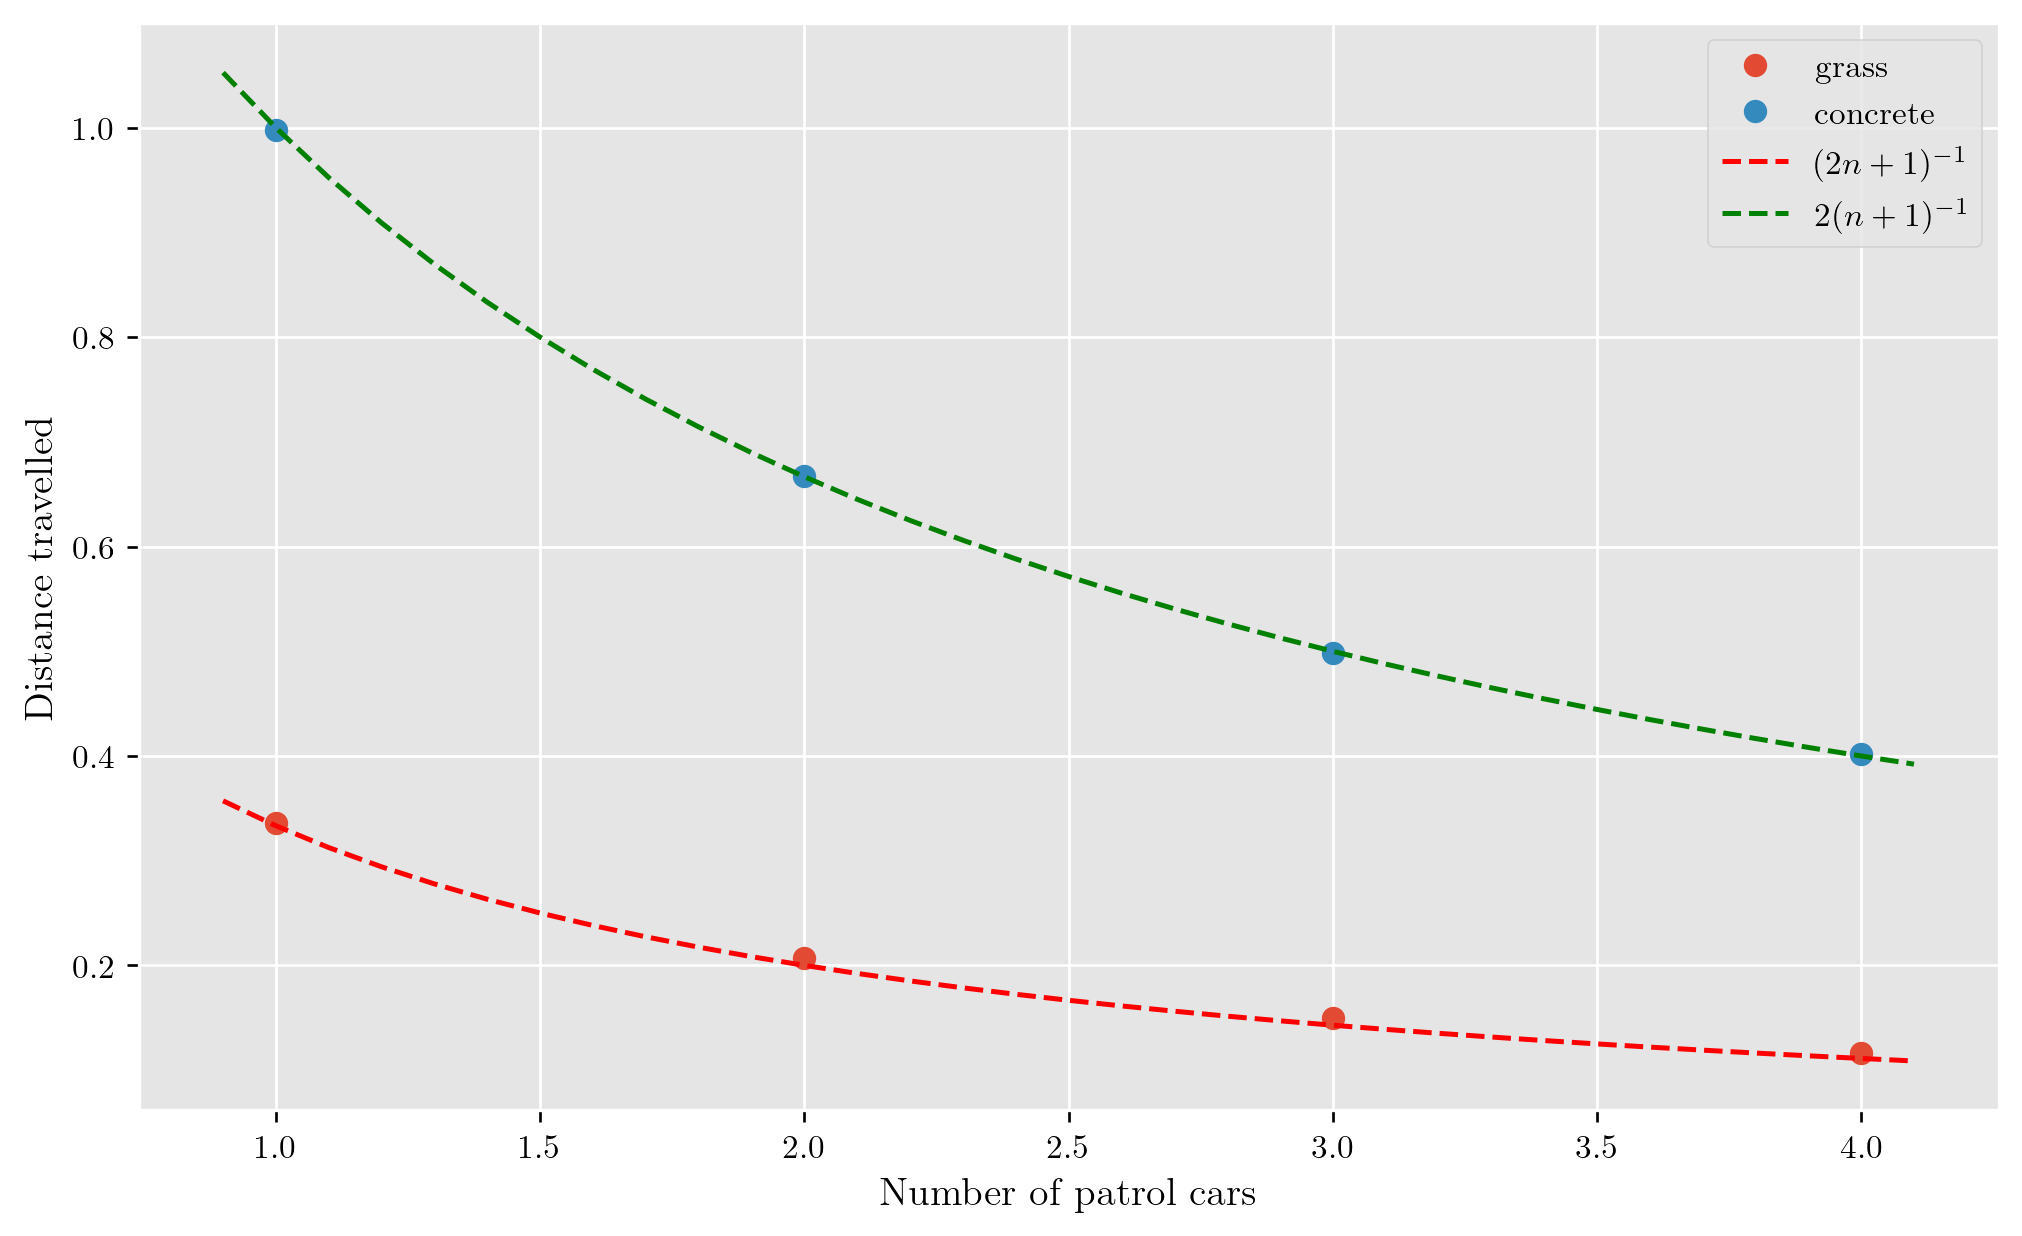

In [24]:
nn=np.arange(0.9,4.2,0.1)

plt.plot(range(1,5), grassData, 'o')

plt.plot(range(1,5), concreteData, 'o')

plt.plot(nn, 1/(2*nn+1), 'r--')
plt.plot(nn, 2/(nn+1), 'g--')

plt.legend(["grass", "concrete","$(2n+1)^{-1}$","$2(n+1)^{-1}$"])
plt.ylabel('Distance travelled')
plt.xlabel('Number of patrol cars')